In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv("daily-total-female-births-CA.csv")

In [3]:
data.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
data["date"]=pd.to_datetime(data["date"])

In [5]:
data.dtypes

date      datetime64[ns]
births             int64
dtype: object

In [6]:
data.set_index("date",inplace=True)

<AxesSubplot:xlabel='date'>

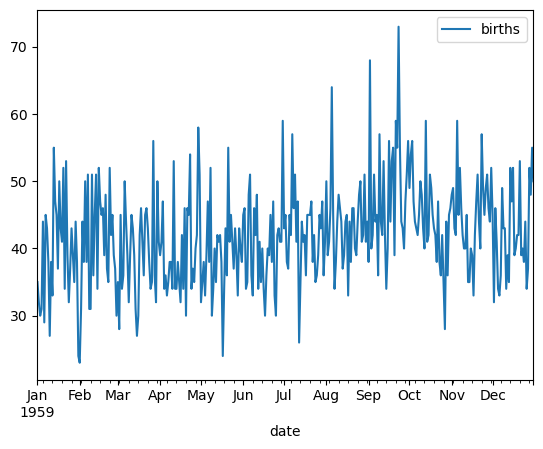

In [7]:
data.plot()

In [8]:
import seaborn as sns

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

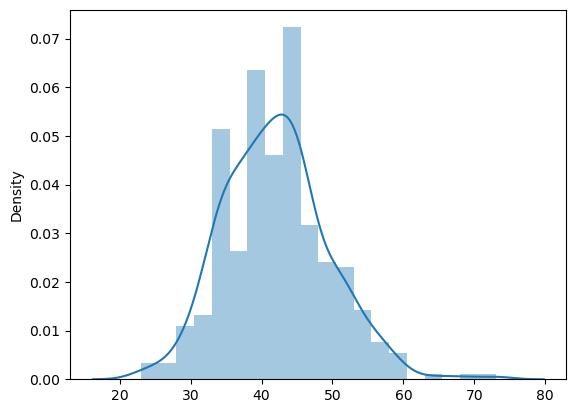

In [9]:
sns.distplot(data)

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
result=adfuller(data['births'])
labels=["ADF","P","logs","no.of obs"]
for res,lab in zip(result,labels):
    print('{}:{}'.format(lab,res))

ADF:-4.808291253559765
P:5.2434129901498554e-05
logs:6
no.of obs:358


# the plot represents a curve that does not have any trend...the obtained p value is less than 0.05 hence,it is a stationary curve.


# ROLLING-AVE-Window size based on domain expertise

<AxesSubplot:xlabel='date'>

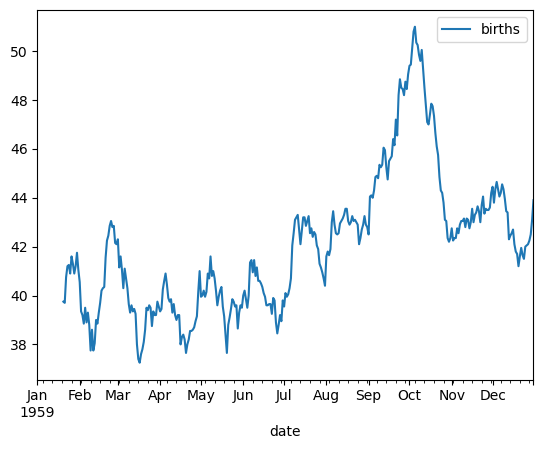

In [12]:
data.rolling(window=20).mean().plot()

<AxesSubplot:xlabel='date'>

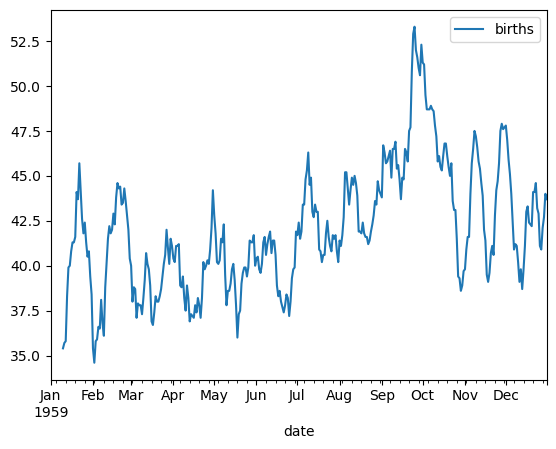

In [13]:
data.rolling(window=10).mean().plot()

<AxesSubplot:xlabel='date'>

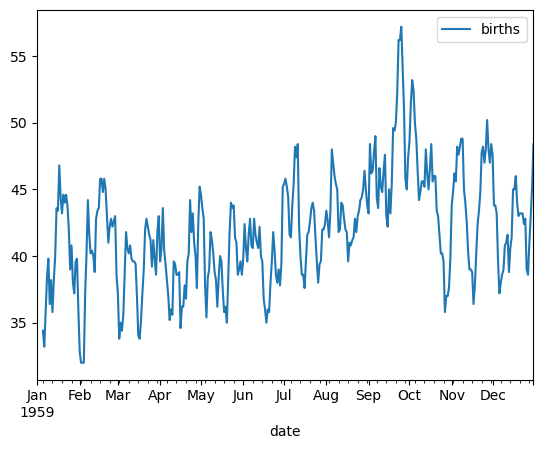

In [14]:
data.rolling(window=5).mean().plot()

In [15]:
data_mean=data.rolling(window=10).mean()

# BASELINE MODEL

In [16]:
baseline=data.shift(1)

In [17]:
baseline_df=pd.DataFrame(baseline)

In [18]:
baseline_df.head(5)

,births
date,
1959-01-01,NaN
1959-01-02,35.0
1959-01-03,32.0
1959-01-04,30.0
1959-01-05,31.0


In [19]:
concated_df_naive=pd.concat([data,baseline_df])


In [20]:
concated_df_naive

,births
date,
1959-01-01,35.0
1959-01-02,32.0
1959-01-03,30.0
1959-01-04,31.0
1959-01-05,44.0
...,...
1959-12-27,34.0
1959-12-28,37.0
1959-12-29,52.0


In [21]:
import matplotlib.pyplot as plt

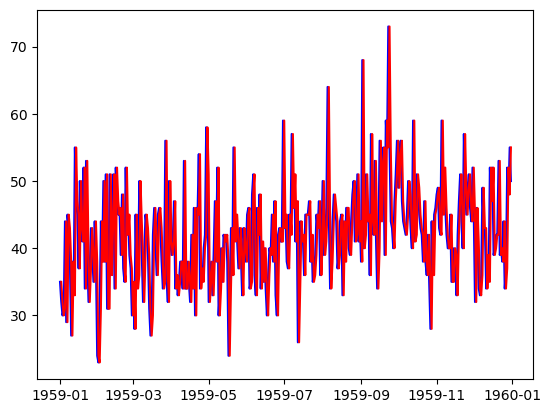

In [22]:
plt.plot(data,color="blue")
plt.plot(baseline_df,color="red")

#baseline model works...but past records are not true reflectors of future values 

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
print("The error of base model is",mean_squared_error(data["births"][1:],baseline_df["births"][1:]))

The error of base model is 84.22252747252747


# ARIMA 

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [26]:
from statsmodels.tsa.arima.model import ARIMA

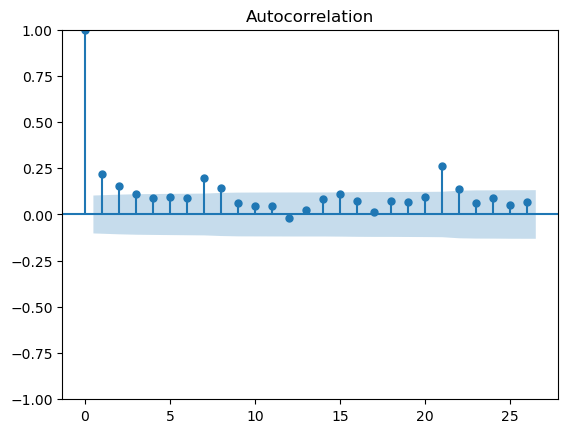

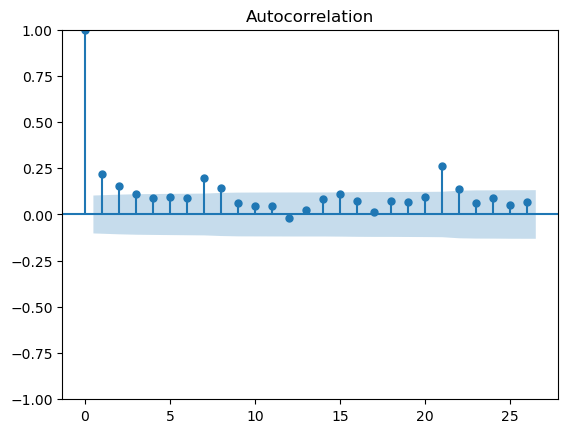

In [27]:
plot_acf(data["births"])

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


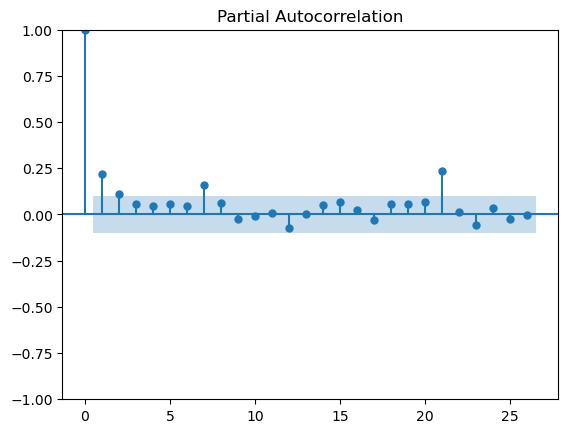

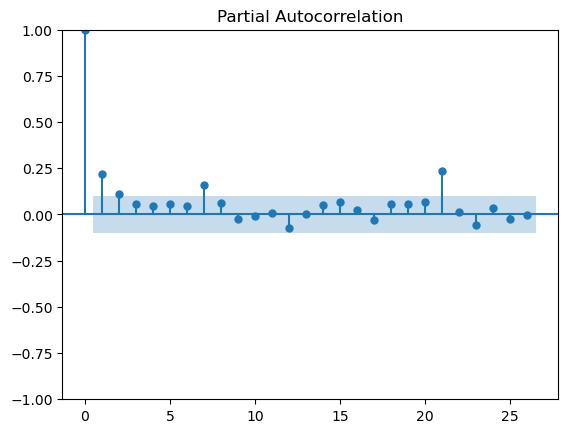

In [28]:
plot_pacf(data["births"])

p=(2,3)
q=(3,4)
d=0 as the data is stationary

In [29]:
data.shape

(365, 1)

# Lets create training and testing data

In [30]:
train=data[0:321]

In [64]:
type(train)

pandas.core.frame.DataFrame

In [31]:
test=data[321:]

In [32]:
print("The test/train is ",len(train)/len(test))

The test/train is  7.295454545454546


In [33]:
arima=ARIMA(train,order=(2,1,3))

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [34]:
model=arima.fit()

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
arima_df=pd.DataFrame(model.forecast(45))

In [36]:
data.tail(45)

,births
date,
1959-11-17,33
1959-11-18,42
1959-11-19,47
1959-11-20,51
1959-11-21,44
1959-11-22,40
1959-11-23,57
1959-11-24,49
1959-11-25,45


In [37]:
print(mean_squared_error(data[320:],arima_df))

43.651900750682536


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()

In [40]:
data_normalize=scaler.fit_transform(data)

In [41]:
data_normalize

array([[0.24],
       [0.18],
       [0.14],
       [0.16],
       [0.42],
       [0.12],
       [0.44],
       [0.4 ],
       [0.3 ],
       [0.08],
       [0.3 ],
       [0.2 ],
       [0.64],
       [0.48],
       [0.44],
       [0.28],
       [0.54],
       [0.4 ],
       [0.36],
       [0.58],
       [0.22],
       [0.6 ],
       [0.32],
       [0.18],
       [0.28],
       [0.4 ],
       [0.32],
       [0.24],
       [0.42],
       [0.3 ],
       [0.02],
       [0.  ],
       [0.16],
       [0.42],
       [0.3 ],
       [0.54],
       [0.3 ],
       [0.56],
       [0.16],
       [0.16],
       [0.56],
       [0.26],
       [0.44],
       [0.56],
       [0.22],
       [0.58],
       [0.48],
       [0.44],
       [0.46],
       [0.32],
       [0.5 ],
       [0.28],
       [0.24],
       [0.58],
       [0.38],
       [0.44],
       [0.32],
       [0.28],
       [0.14],
       [0.24],
       [0.1 ],
       [0.44],
       [0.22],
       [0.26],
       [0.54],
       [0.42],
       [0.

# USER WRITTEN FUNCTION TO NORMALIZE DATA

In [42]:
def normalizedata(feature):
    data_array=np.asarray(data[feature])
    maxi=max(data_array)
    mini=min(data_array)
    res=[]
    for i in data_array:
        res.append((i-mini)/(maxi-mini))
    return res

In [43]:
a=normalizedata("births")

In [44]:
a

[0.24,
 0.18,
 0.14,
 0.16,
 0.42,
 0.12,
 0.44,
 0.4,
 0.3,
 0.08,
 0.3,
 0.2,
 0.64,
 0.48,
 0.44,
 0.28,
 0.54,
 0.4,
 0.36,
 0.58,
 0.22,
 0.6,
 0.32,
 0.18,
 0.28,
 0.4,
 0.32,
 0.24,
 0.42,
 0.3,
 0.02,
 0.0,
 0.16,
 0.42,
 0.3,
 0.54,
 0.3,
 0.56,
 0.16,
 0.16,
 0.56,
 0.26,
 0.44,
 0.56,
 0.22,
 0.58,
 0.48,
 0.44,
 0.46,
 0.32,
 0.5,
 0.28,
 0.24,
 0.58,
 0.38,
 0.44,
 0.32,
 0.28,
 0.14,
 0.24,
 0.1,
 0.44,
 0.22,
 0.26,
 0.54,
 0.42,
 0.32,
 0.18,
 0.32,
 0.44,
 0.4,
 0.32,
 0.16,
 0.08,
 0.14,
 0.38,
 0.46,
 0.36,
 0.26,
 0.44,
 0.46,
 0.4,
 0.3,
 0.22,
 0.24,
 0.66,
 0.26,
 0.18,
 0.54,
 0.36,
 0.32,
 0.36,
 0.48,
 0.22,
 0.26,
 0.2,
 0.24,
 0.3,
 0.3,
 0.22,
 0.6,
 0.22,
 0.22,
 0.3,
 0.24,
 0.18,
 0.38,
 0.22,
 0.46,
 0.14,
 0.46,
 0.44,
 0.62,
 0.22,
 0.28,
 0.24,
 0.34,
 0.38,
 0.7,
 0.56,
 0.18,
 0.24,
 0.3,
 0.2,
 0.32,
 0.48,
 0.3,
 0.58,
 0.14,
 0.22,
 0.34,
 0.24,
 0.38,
 0.36,
 0.38,
 0.3,
 0.02,
 0.22,
 0.4,
 0.26,
 0.64,
 0.36,
 0.44,
 0.36,
 0.28,
 0.4,
 0.32,

In [45]:
data_normalize.size

365

In [46]:
type(data_normalize)

numpy.ndarray

In [47]:
train_data_n=data_normalize[0:320]
test_data_n=data_normalize[321:365]

In [48]:
arima_n=ARIMA(train_data_n,order=(2,1,3))

In [49]:
model_n=arima_n.fit()

In [50]:
pred2=model_n.forecast(steps=45)

In [51]:
pred2

array([0.39702427, 0.40547476, 0.40879794, 0.41058014, 0.41115277,
       0.41156322, 0.41163401, 0.41174502, 0.41173752, 0.41177473,
       0.41176231, 0.41177746, 0.41176944, 0.4117764 , 0.41177198,
       0.41177538, 0.41177306, 0.41177476, 0.41177357, 0.41177443,
       0.41177382, 0.41177426, 0.41177395, 0.41177417, 0.41177401,
       0.41177412, 0.41177404, 0.4117741 , 0.41177406, 0.41177409,
       0.41177407, 0.41177408, 0.41177407, 0.41177408, 0.41177407,
       0.41177408, 0.41177408, 0.41177408, 0.41177408, 0.41177408,
       0.41177408, 0.41177408, 0.41177408, 0.41177408, 0.41177408])

In [52]:
pred2.shape

(45,)

In [53]:
print("The mean squared error of arima applied after normalization is",mean_squared_error(test_data_n,pred2[1:]))

The mean squared error of arima applied after normalization is 0.016595652506767516


# The error has been drastically reduced after normalization

# Feature engineering

In [54]:
data["shift1"]=data["births"].shift(1)

In [55]:
data.head()

,births,shift1
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [56]:
data["shift2"]=data["births"].shift(2)

In [57]:
data.head(5)

,births,shift1,shift2
date,,,
1959-01-01,35,NaN,NaN
1959-01-02,32,35.0,NaN
1959-01-03,30,32.0,35.0
1959-01-04,31,30.0,32.0
1959-01-05,44,31.0,30.0


In [58]:
data["MA3"]=data["births"].rolling(window=3).mean()

In [59]:
data["MA4"]=data["births"].rolling(window=4).mean()

In [60]:
data.head()

,births,shift1,shift2,MA3,MA4
date,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,32.333333,NaN
1959-01-04,31,30.0,32.0,31.000000,32.00
1959-01-05,44,31.0,30.0,35.000000,34.25


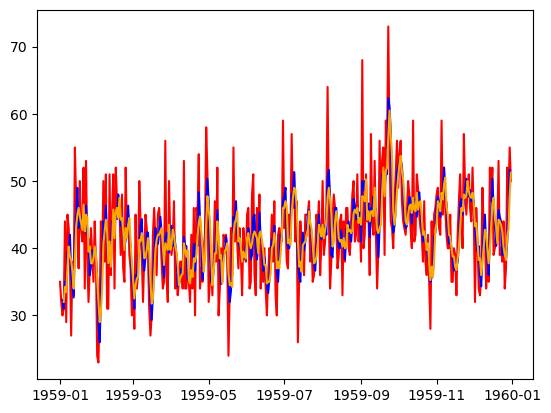

In [61]:
plt.plot(data["births"],color="red")
plt.plot(data["MA3"],color="blue")
plt.plot(data["MA4"],color="orange")


In [62]:
data["month"]=data.index.month

In [63]:
data.head(5)

,births,shift1,shift2,MA3,MA4,month
date,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,1
1959-01-02,32,35.0,NaN,NaN,NaN,1
1959-01-03,30,32.0,35.0,32.333333,NaN,1
1959-01-04,31,30.0,32.0,31.000000,32.00,1
1959-01-05,44,31.0,30.0,35.000000,34.25,1


# By rolling and shifting we have added more features in our data.